Mean Squared Error: 0.0321
R-squared Score: 0.9859

Feature Importance:
                 Feature  Importance
12                 Votes    0.901824
10          Rating color    0.080489
11           Rating text    0.008937
2               Cuisines    0.003639
3   Average Cost for two    0.002451
1                   City    0.001438
6    Has Online delivery    0.000520
9            Price range    0.000346
5      Has Table booking    0.000183
4               Currency    0.000063
0           Country Code    0.000062
7      Is delivering now    0.000047
8   Switch to order menu    0.000000


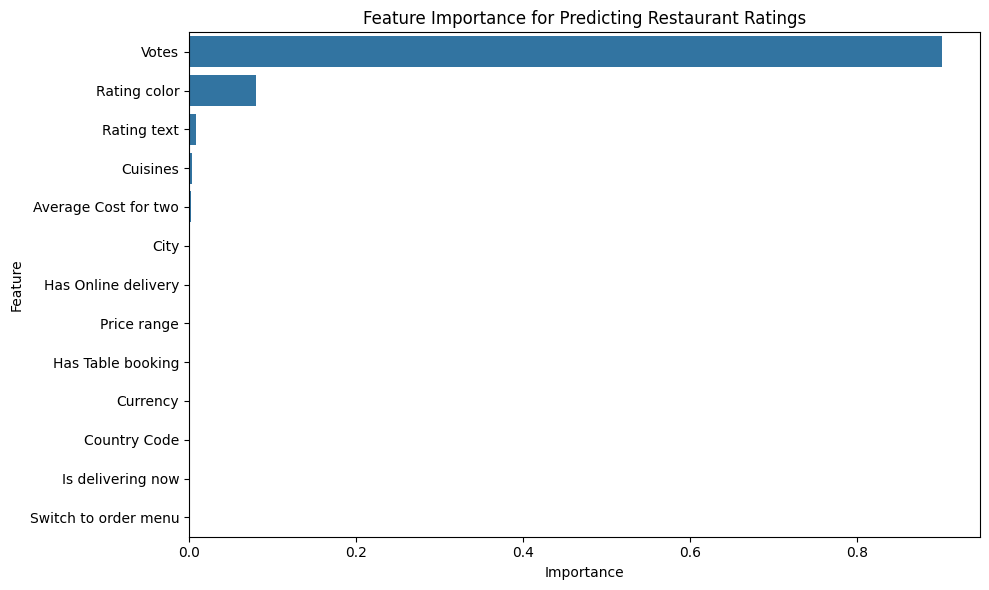

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('Dataset .csv', encoding='latin1')

# Dropping rows where the target variable 'Aggregate rating' is missing
data = data.dropna(subset=['Aggregate rating'])

# Handling missing values in 'Cuisines' by filling with 'Unknown'
data['Cuisines'] = data['Cuisines'].fillna('Unknown')

# Dropping columns that are not useful for prediction or have too many unique values
# Correcting column names based on observed data
columns_to_drop = ['ï»¿Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']
data = data.drop(columns=columns_to_drop)

# Encoding categorical variables
le = LabelEncoder()
categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
                    'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Converting 'Country Code' to categorical (if needed) and encoding
data['Country Code'] = le.fit_transform(data['Country Code'].astype(str))

# Defining features and target
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Score: {r2:.4f}')

# Analyzing feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Restaurant Ratings')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()